# Calculando la fdp de una variable aleatoria

En esta notebook está el código completo de los ejemplos mostrados en las filminas.

In [15]:
%matplotlib inline
import itertools
import numpy
import pandas
import seaborn

In [16]:
C, S = 'c', 's'
SAMPLE_SPACE = ['-'.join(x) for x in
                itertools.product([C, S], repeat=3)]
SAMPLE_SPACE

['c-c-c', 'c-c-s', 'c-s-c', 'c-s-s', 's-c-c', 's-c-s', 's-s-c', 's-s-s']

In [17]:
sampled_values = [
    x.count(C) for x in numpy.random.choice(SAMPLE_SPACE, 1000)]

In [18]:
result = numpy.unique(sampled_values, return_counts=True)
[(label, count/1000.0) for label, count in zip(*result)]

[(0, 0.121), (1, 0.371), (2, 0.39200000000000002), (3, 0.11600000000000001)]

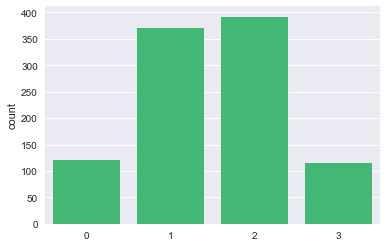

In [19]:
seaborn.countplot(sampled_values, color='#2ecc71')
seaborn.despine()

---
## Ahora con datos reales

In [20]:
vinstitucional = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
    encoding='utf8')
vinstitucional[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Una forma de calcular fdps es usando las funciones provistas por **pandas**.

In [21]:
fdps = vinstitucional.area.value_counts(normalize=True)
fdps

PRONALCI                   0.456189
Centro de Denuncias        0.340751
DNPCVI                     0.099444
Otros                      0.036161
Ulloa                      0.021558
Juridicos Nacional         0.021558
Juridicos Internacional    0.018081
Salud Mental               0.006259
Name: area, dtype: float64

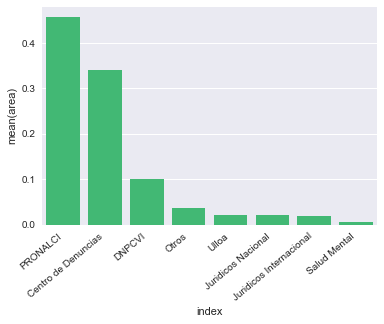

In [22]:
ax = seaborn.barplot(data=fdps.to_frame().reset_index(),
    x='index', y='area', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

Otra forma, más tradicional es usando **numpy** directamente

In [23]:
areas, counts = numpy.unique(vinstitucional.area.values.astype(str),
                             return_counts=True)
total = counts.sum()
fdps = [x/float(counts.sum()) for x in counts]
[x for x in zip(areas, fdps)]

[('Centro de Denuncias', 0.34051424600416957),
 ('DNPCVI', 0.099374565670604584),
 ('Juridicos Internacional', 0.018068102849200834),
 ('Juridicos Nacional', 0.021542738012508687),
 ('Otros', 0.036136205698401667),
 ('PRONALCI', 0.45587213342599026),
 ('Salud Mental', 0.0062543432939541352),
 ('Ulloa', 0.021542738012508687),
 ('nan', 0.00069492703266157052)]

Para visualizar la distribución obtenida, podemos usar **seaborn** o **matplotlib**

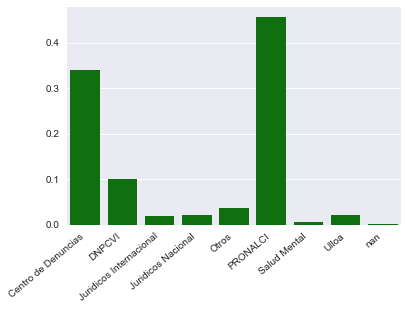

In [24]:
ax = seaborn.barplot(x=areas, y=fdps, color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

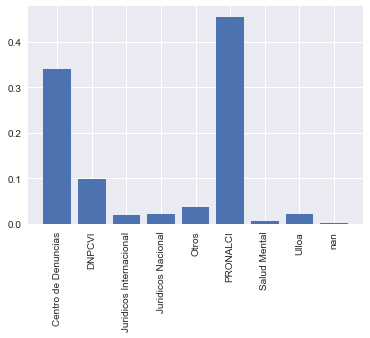

In [32]:
import matplotlib.pyplot as plt
x = range(len(areas))
plt.bar(x, fdps)
plt.xticks(x, areas, rotation='vertical');